In [1]:
import os
os.environ['PYSPARK_SUBMIT_ARGS'] = '--conf spark.ui.port=4040 --packages com.datastax.spark:spark-cassandra-connector_2.11:2.3.1 pyspark-shell'
import time

In [2]:
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext, Row
conf = SparkConf() \
    .setAppName("Streaming test") \
    .setMaster("local[2]") \
    .set("spark.cassandra.connection.host", "cassandra")
sc = SparkContext(conf=conf) 
sqlContext=SQLContext(sc)

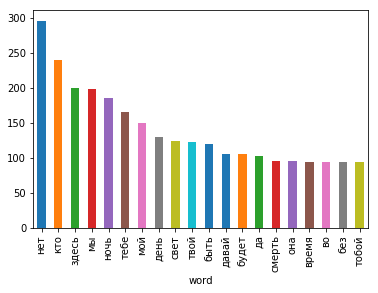

In [8]:
import matplotlib
import pandas
%matplotlib inline
#update every 2sec?
data=sqlContext.read\
    .format("org.apache.spark.sql.cassandra")\
    .options(table="words1", keyspace="sparkcassandrakeyspace")\
    .load()
dfPanda = data.toPandas()
dfPanda.sort_values(by=['count'], ascending=False).set_index('word')['count'].head(20).plot(kind="bar")